<a href="https://colab.research.google.com/github/mbuguajnr23/ACLED/blob/main/Optimizing_hyperparameters_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [2]:
# Load Iris dataset using sklearn
iris_data = load_iris(as_frame=True)
df = iris_data['frame']

In [3]:
# Display the first few rows of the dataset
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
# Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']


In [5]:
# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


In [6]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


In [7]:
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (120, 4)
Test set size: (30, 4)


In [8]:
def knn_with_metrics(k):
    # Initialize the kNN model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Predict on the test data
    y_pred = knn.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall


In [9]:
# Example for k=3
k = 3
accuracy, precision, recall = knn_with_metrics(k)
print(f"For k={k}: Accuracy={accuracy}, Precision={precision}, Recall={recall}")

For k=3: Accuracy=1.0, Precision=1.0, Recall=1.0


In [10]:
# Evaluate the model for multiple k values
results = []
for k in range(1, 11):
    accuracy, precision, recall = knn_with_metrics(k)
    results.append((k, accuracy, precision, recall))


In [11]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['k', 'Accuracy', 'Precision', 'Recall'])
print(results_df)

    k  Accuracy  Precision  Recall
0   1       1.0        1.0     1.0
1   2       1.0        1.0     1.0
2   3       1.0        1.0     1.0
3   4       1.0        1.0     1.0
4   5       1.0        1.0     1.0
5   6       1.0        1.0     1.0
6   7       1.0        1.0     1.0
7   8       1.0        1.0     1.0
8   9       1.0        1.0     1.0
9  10       1.0        1.0     1.0


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

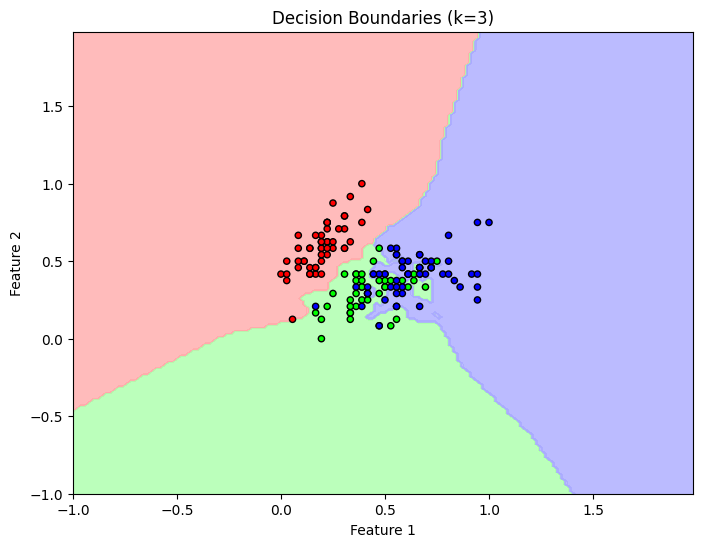

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, k):
    h = 0.02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Fit the kNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the results for each point in the grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(f"Decision Boundaries (k={k})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# For visualization, reduce dataset to 2 features
X_reduced = X_normalized[:, :2]  # Using only the first two features
y_reduced = y.values  # Convert to numpy array for compatibility

# Plot decision boundaries for k=3
plot_decision_boundaries(X_reduced, y_reduced, k=3)
